In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\pothu\OneDrive\Desktop\titles.csv") # loaded the dataset

In [3]:
df.shape    

(5850, 15)

In [4]:
df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [5]:
df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [6]:
df.drop(["description","imdb_id","tmdb_popularity","tmdb_score"],inplace=True,axis=1)  # dropping the unwanted columns

In [7]:
df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0
...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.8,45.0
5846,tm898842,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],[],NaN,7.7,348.0
5847,tm1059008,Lokillo,MOVIE,2021,NaN,90,['comedy'],['CO'],NaN,3.8,68.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],['US'],NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   release_year          5850 non-null   int64  
 4   age_certification     3231 non-null   object 
 5   runtime               5850 non-null   int64  
 6   genres                5850 non-null   object 
 7   production_countries  5850 non-null   object 
 8   seasons               2106 non-null   float64
 9   imdb_score            5368 non-null   float64
 10  imdb_votes            5352 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 502.9+ KB


In [9]:
df.isna().sum() # checking null values are there or not

id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_score               482
imdb_votes               498
dtype: int64

In [10]:
def null_value():
    return (df.isna().sum())*100/len(df)

In [11]:
null_value()   # calculating null value percentage

id                       0.000000
title                    0.017094
type                     0.000000
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_score               8.239316
imdb_votes               8.512821
dtype: float64

In [12]:
df["title"]=df["title"].fillna("Unknown")

In [13]:
df["age_certification"].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [14]:
df["age_certification"]=df["age_certification"].fillna(df["age_certification"].mode()[0])

In [15]:
df["seasons"]=df["seasons"].fillna(0)

In [16]:
df[["imdb_score","imdb_votes"]]=df[["imdb_score","imdb_votes"]].fillna(df[["imdb_score","imdb_votes"]].median())

In [17]:
null_value()

id                      0.0
title                   0.0
type                    0.0
release_year            0.0
age_certification       0.0
runtime                 0.0
genres                  0.0
production_countries    0.0
seasons                 0.0
imdb_score              0.0
imdb_votes              0.0
dtype: float64

In [18]:
df.duplicated().sum()

0

In [19]:
df["seasons"]=df["seasons"].astype(int)

In [20]:
df.select_dtypes(include=["int","float"])

,release_year,runtime,seasons,imdb_score,imdb_votes
0,1945,51,1,6.6,2233.5
1,1976,114,0,8.2,808582.0
2,1972,109,0,7.7,107673.0
3,1975,91,0,8.2,534486.0
4,1967,150,0,7.7,72662.0
...,...,...,...,...,...
5845,2021,100,0,6.8,45.0
5846,2021,134,0,7.7,348.0
5847,2021,90,0,3.8,68.0
5848,2021,37,0,6.6,2233.5


In [21]:
def outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lowest = q1 - 1.5 * iqr
    highest = q3 + 1.5 * iqr
    print("q1:",q1)
    print("q3:",q3)
    print("iqr:",iqr)
    print("lowest:",lowest)
    print("highest:",highest)
    k=df[(df[column]>=lowest) & (df[column]<=highest)]
    print("shape:",k.shape)
    k[column].plot.box(vert=False)

q1: 2016.0
q3: 2020.0
iqr: 4.0
lowest: 2010.0
highest: 2026.0
shape: (5276, 11)


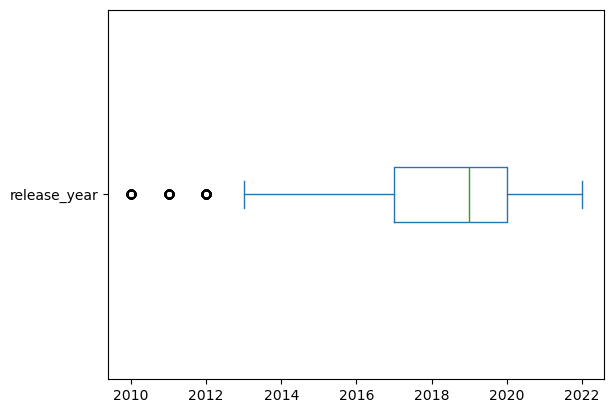

In [22]:
 outliers(column="release_year")

q1: 44.0
q3: 104.0
iqr: 60.0
lowest: -46.0
highest: 194.0
shape: (5840, 11)


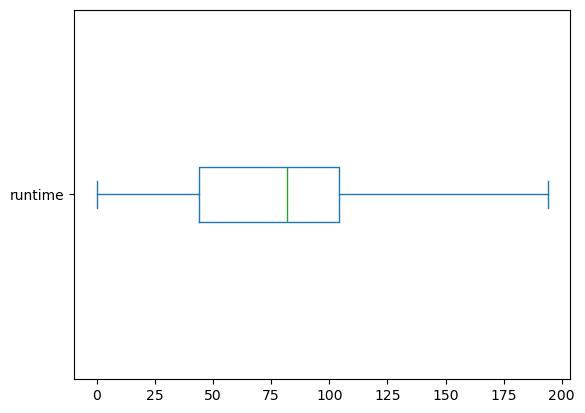

In [23]:
 outliers(column="runtime")

q1: 0.0
q3: 1.0
iqr: 1.0
lowest: -1.5
highest: 2.5
shape: (5354, 11)


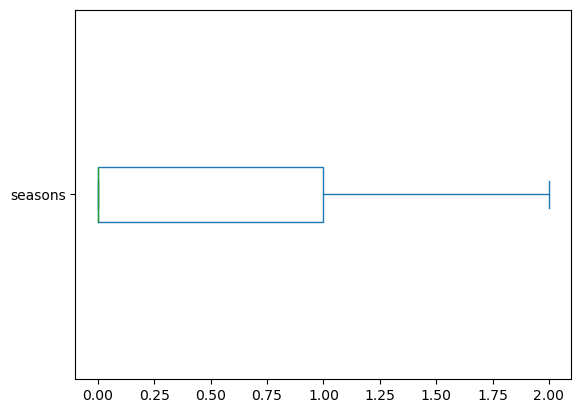

In [24]:
outliers(column="seasons")

q1: 5.9
q3: 7.3
iqr: 1.3999999999999995
lowest: 3.800000000000001
highest: 9.399999999999999
shape: (5712, 11)


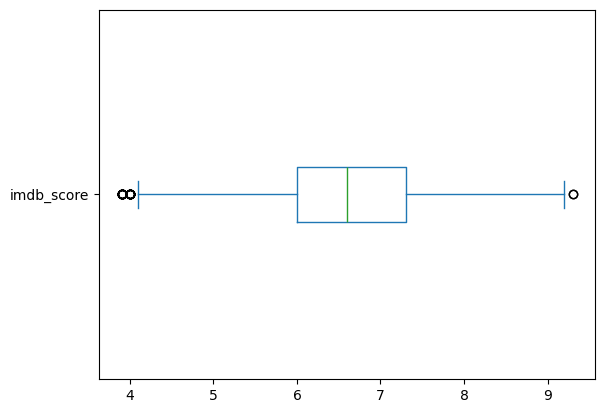

In [25]:
outliers("imdb_score")

q1: 604.25
q3: 7976.0
iqr: 7371.75
lowest: -10453.375
highest: 19033.625
shape: (4919, 11)


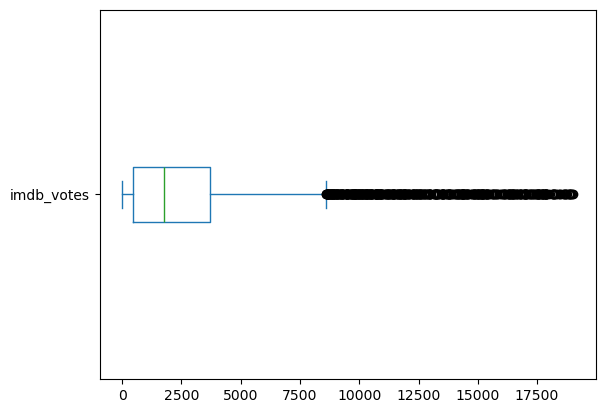

In [26]:
outliers("imdb_votes")

In [27]:
def list_text(arr):
    arr = ast.literal_eval(arr)

    if len(arr) == 0:
        return np.nan

    elif len(arr) == 1:
        return arr[0]

    else:
        return random.choice(arr)

In [28]:
df["genres"]=df["genres"].apply(list_text)

In [29]:
df["production_countries"]=df["production_countries"].apply(list_text)

In [30]:
df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,documentation,US,1,6.6,2233.5
1,tm84618,Taxi Driver,MOVIE,1976,R,114,crime,US,0,8.2,808582.0
2,tm154986,Deliverance,MOVIE,1972,R,109,european,US,0,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,GB,0,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,1967,TV-MA,150,war,GB,0,7.7,72662.0
...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,TV-MA,100,romance,NG,0,6.8,45.0
5846,tm898842,C/O Kaadhal,MOVIE,2021,TV-MA,134,drama,NaN,0,7.7,348.0
5847,tm1059008,Lokillo,MOVIE,2021,TV-MA,90,comedy,CO,0,3.8,68.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,NaN,US,0,6.6,2233.5


release_year


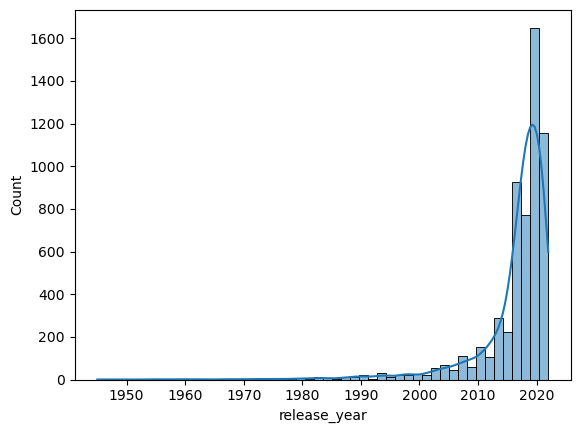

runtime


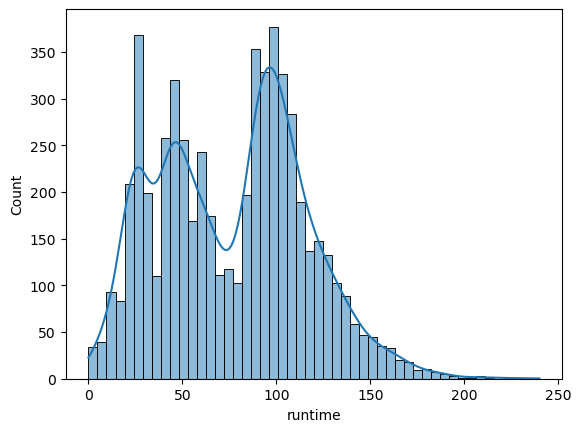

seasons


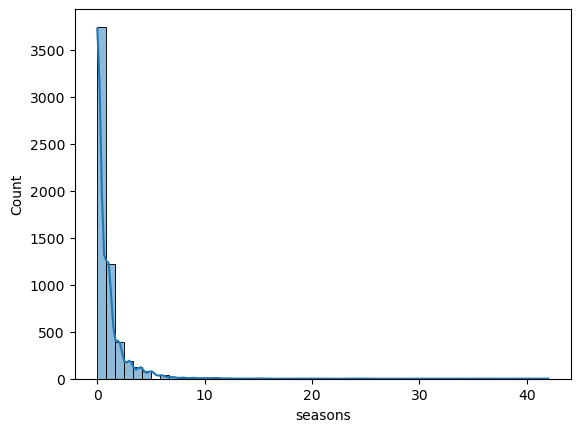

imdb_score


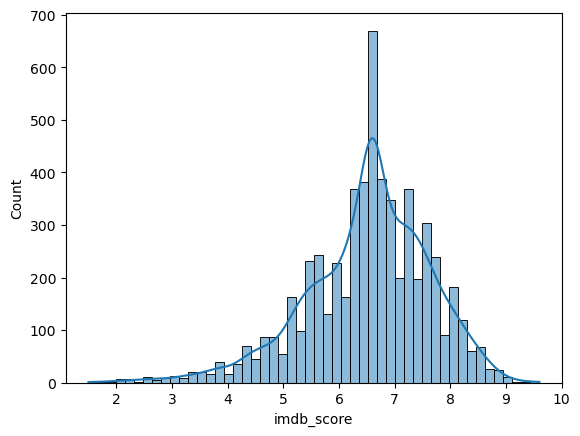

imdb_votes


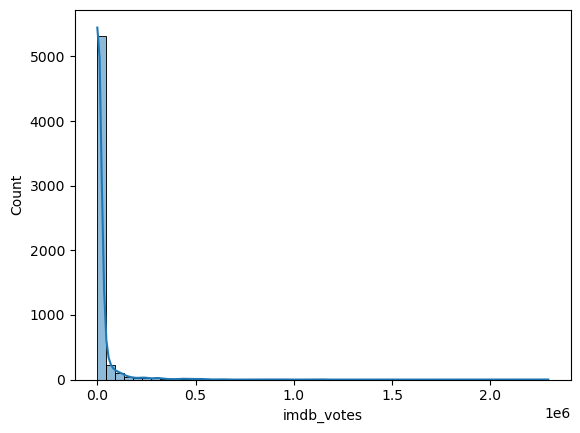

In [31]:
for i in df.select_dtypes(include=["int","float"]):
    print(i)
    sns.histplot(x=i,data=df,bins=50,kde=True)
    plt.show()

In [32]:
for i in df.select_dtypes(include="object"):
    print(i)

id
title
type
age_certification
genres
production_countries


In [33]:
df.select_dtypes(include="object").head(3)

,id,title,type,age_certification,genres,production_countries
0,ts300399,Five Came Back: The Reference Films,SHOW,TV-MA,documentation,US
1,tm84618,Taxi Driver,MOVIE,R,crime,US
2,tm154986,Deliverance,MOVIE,R,european,US


# UNIVARIATE ANALYSIS

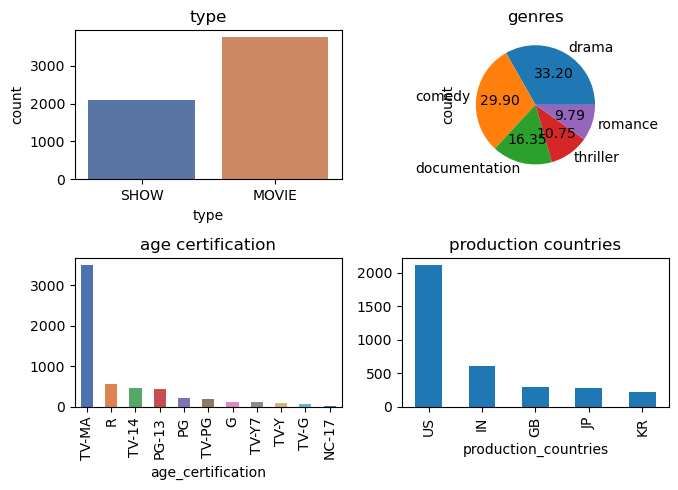

In [183]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

axes[0][0].set_title("type")
sns.countplot(x="type",data=df,palette="deep",ax=axes[0][0])

axes[0][1].set_title("genres")
df["genres"].value_counts().nlargest(5).plot.pie(autopct="%.2f",figsize=(7,5),ax=axes[0][1])

axes[1][0].set_title("age certification")
age_counts = df["age_certification"].value_counts()
colors = sns.color_palette("deep", len(age_counts)) 
age_counts.plot.bar(color=colors,ax=axes[1][0])

axes[1][1].set_title("production countries")
df["production_countries"].value_counts().nlargest(5).plot.bar(ax=axes[1][1])

plt.tight_layout()
plt.show()


In [36]:
df["title"].nunique()

5798

In [37]:
df["type"].value_counts()  # movies are more

type
MOVIE    3744
SHOW     2106
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

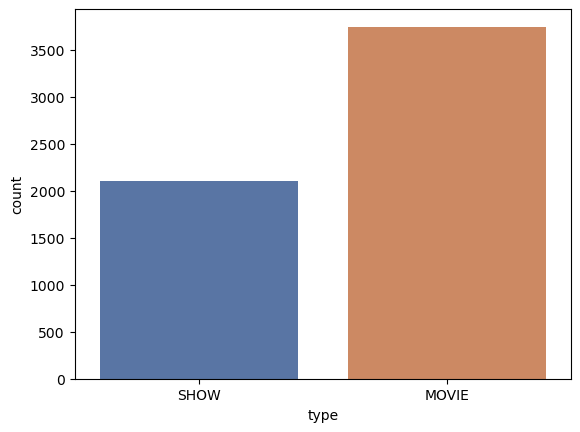

In [38]:
sns.countplot(x="type",data=df,palette="deep")

In [39]:
df["genres"].nunique()

19

In [40]:
df["genres"].value_counts()

genres
drama            1210
comedy           1090
documentation     596
thriller          392
romance           357
action            307
crime             307
family            229
animation         229
fantasy           166
reality           161
scifi             157
european          150
horror            116
music             107
history            99
sport              65
war                45
western             8
Name: count, dtype: int64

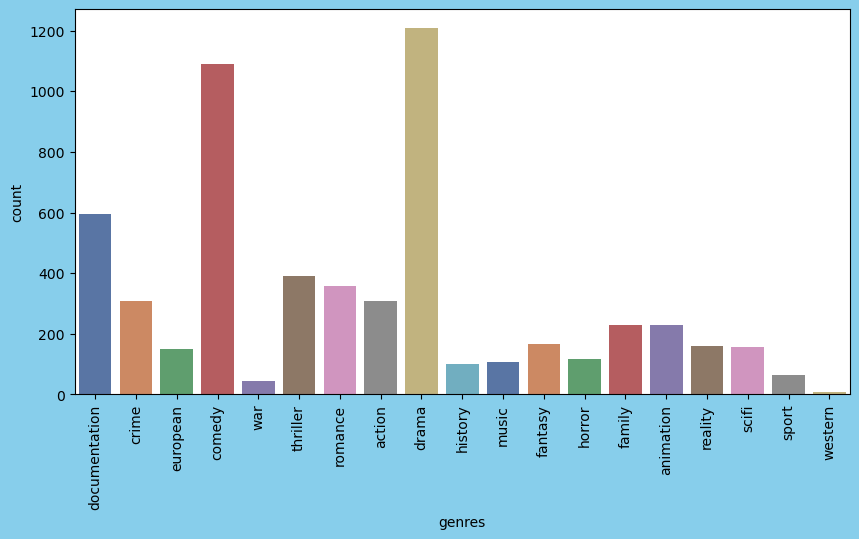

In [165]:
plt.figure(figsize=(10,5),facecolor="skyblue")
sns.countplot(x = 'genres', data = df,palette="deep")
plt.xticks(rotation=90)
plt.show()

In [42]:
# TV-MA (Mature audiences only) ----  not for under 17 or 18 (includes graphic violence, explicit language)
# R (restricted) -------------------  Contains strong language, intense violence, drug use(above 18 or accompained by an adult).
# PG (Parental Guidance) -----------  Parental guidance is suggested.
# TV-14   -------------------------- Suitable for ages 14 and up.
# PG-13   --------------------------  May include more intense violence, language, or suggestive themes.
# TV-PG   --------------------------  Parental guidance suggested.
# TV-Y    ----------------------------Suitable for all children.
# TV-G (General audience)-------------Content is appropriate for all ages, including families.
# TV-Y7   ----------------------------Suitable for children 7 and older.
# G (General audience)----------------Content is appropriate for all ages, including families.
# NC-17   --------------------------   No one 17 and under admitted.

df["age_certification"].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

<Axes: xlabel='age_certification', ylabel='count'>

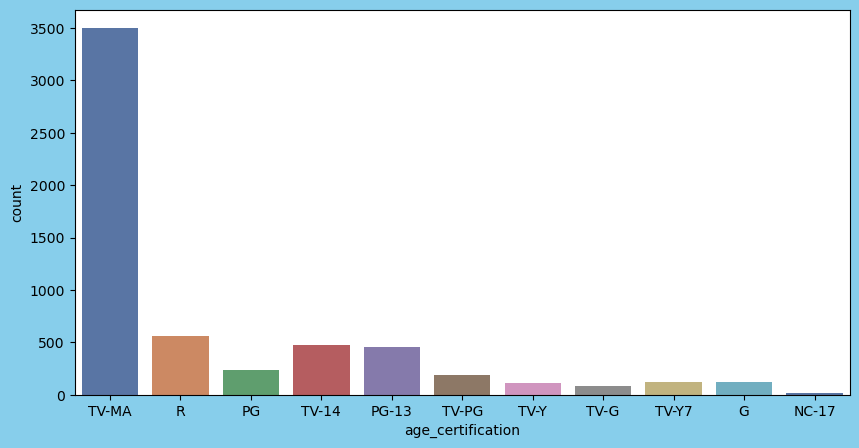

In [157]:
plt.figure(figsize=(10,5),facecolor="skyblue")
sns.countplot(x = 'age_certification', data = df,palette="deep")

In [44]:
df["production_countries"].nunique()

93

In [45]:
df["production_countries"].value_counts()     # US produced more

production_countries
US    2115
IN     614
GB     295
JP     277
KR     224
      ... 
KH       1
CU       1
IR       1
CD       1
FO       1
Name: count, Length: 93, dtype: int64

<Axes: xlabel='production_countries'>

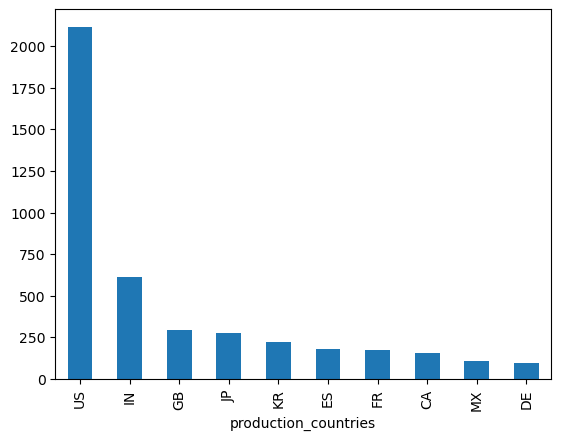

In [331]:
df["production_countries"].value_counts().nlargest(10).plot.bar()

In [377]:
b=df.groupby('release_year').size().reset_index().rename(columns={0:"counts"})
b

,release_year,counts
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,773
59,2019,836
60,2020,814
61,2021,787


<Axes: xlabel='release_year', ylabel='counts'>

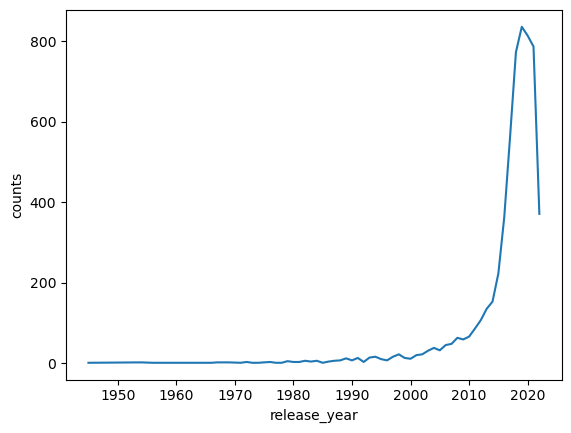

In [381]:
sns.lineplot(x = 'release_year', y = "counts", data = b) # max content was released in 2019

# BIVARIATE ANALYSIS

In [47]:
df.groupby('type')[['imdb_score']].mean()

,imdb_score
type,
MOVIE,6.276469
SHOW,6.947958


<Axes: xlabel='type', ylabel='imdb_score'>

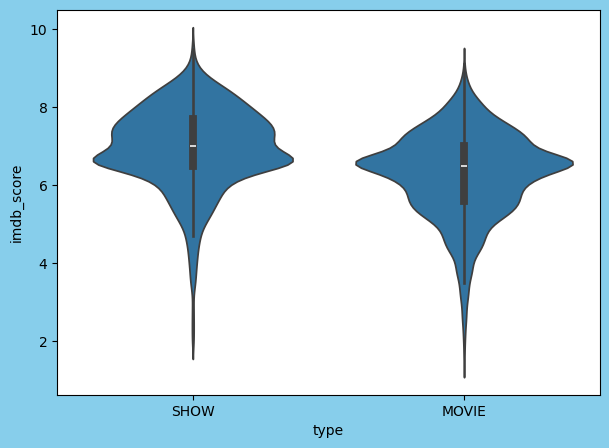

In [201]:
plt.figure(figsize=(7,5),facecolor="skyblue")
sns.violinplot(x="type",y="imdb_score",data=df)

In [49]:
df.groupby('genres')['type'].value_counts()

genres         type 
action         MOVIE    208
               SHOW      99
animation      SHOW     126
               MOVIE    103
comedy         MOVIE    792
               SHOW     298
crime          MOVIE    171
               SHOW     136
documentation  MOVIE    387
               SHOW     209
drama          MOVIE    808
               SHOW     402
european       MOVIE    118
               SHOW      32
family         MOVIE    120
               SHOW     109
fantasy        MOVIE    100
               SHOW      66
history        MOVIE     63
               SHOW      36
horror         MOVIE     90
               SHOW      26
music          MOVIE     91
               SHOW      16
reality        SHOW     159
               MOVIE      2
romance        MOVIE    263
               SHOW      94
scifi          SHOW     114
               MOVIE     43
sport          MOVIE     40
               SHOW      25
thriller       MOVIE    279
               SHOW     113
war            MOVIE     27

<Axes: xlabel='genres'>

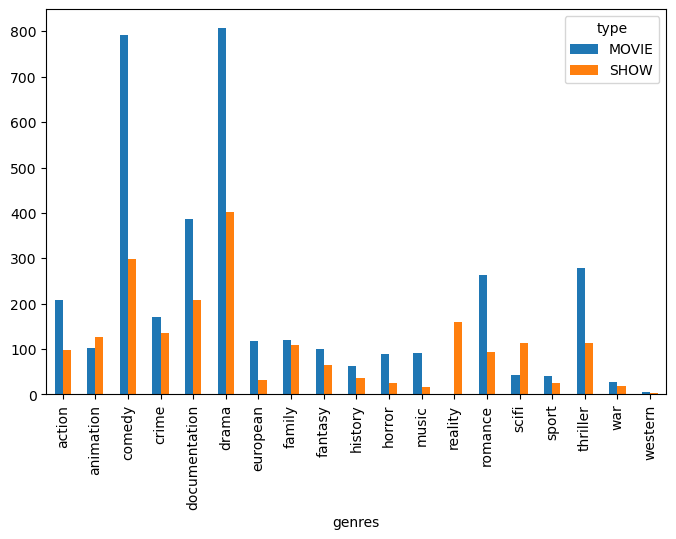

In [191]:
pd.crosstab(index=df["genres"],columns=df["type"]).plot.bar(figsize=(8,5))

In [51]:
df.groupby('age_certification')['type'].value_counts()

age_certification  type 
G                  MOVIE     124
NC-17              MOVIE      16
PG                 MOVIE     233
PG-13              MOVIE     451
R                  MOVIE     556
TV-14              SHOW      474
TV-G               SHOW       79
TV-MA              MOVIE    2364
                   SHOW     1138
TV-PG              SHOW      188
TV-Y               SHOW      107
TV-Y7              SHOW      120
Name: count, dtype: int64

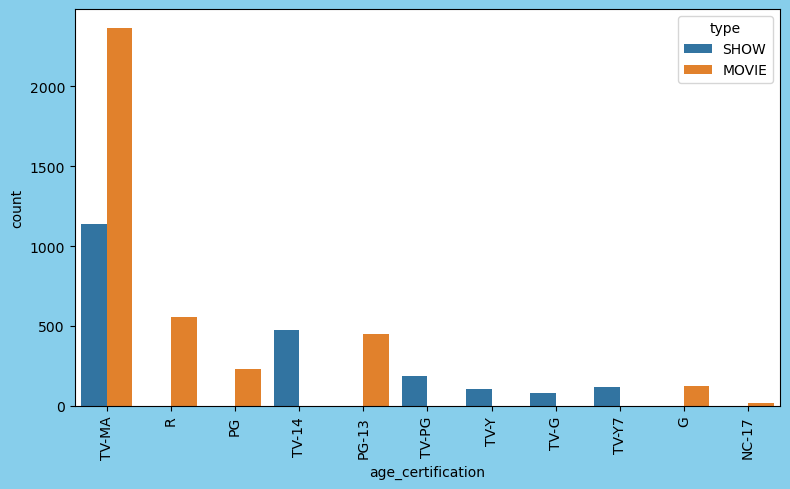

In [195]:
plt.figure(figsize=(8,5),facecolor="skyblue")
sns.countplot(x="age_certification",hue="type",data=df)
plt.xticks(rotation = 90)
plt.tight_layout()

In [53]:
df.groupby("genres")["runtime"].mean()

genres
action           87.814332
animation        39.659389
comedy           71.817431
crime            82.596091
documentation    65.525168
drama            89.044628
european         86.813333
family           56.170306
fantasy          73.487952
history          90.919192
horror           86.939655
music            83.467290
reality          42.099379
romance          95.341737
scifi            53.490446
sport            78.015385
thriller         91.313776
war              87.711111
western          85.625000
Name: runtime, dtype: float64

<Axes: xlabel='genres'>

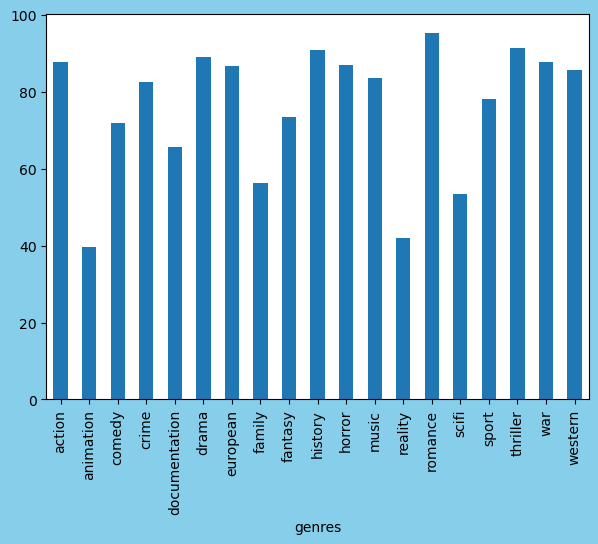

In [205]:
plt.figure(figsize=(7,5),facecolor="skyblue")
df.groupby("genres")["runtime"].mean().plot.bar()

In [55]:
df.groupby("type")["runtime"].mean()

type
MOVIE    98.213675
SHOW     38.978158
Name: runtime, dtype: float64

In [56]:
df.groupby("type")["runtime"].max()

type
MOVIE    240
SHOW     190
Name: runtime, dtype: int64

In [57]:
df.groupby("type")["runtime"].min()

type
MOVIE    2
SHOW     0
Name: runtime, dtype: int64

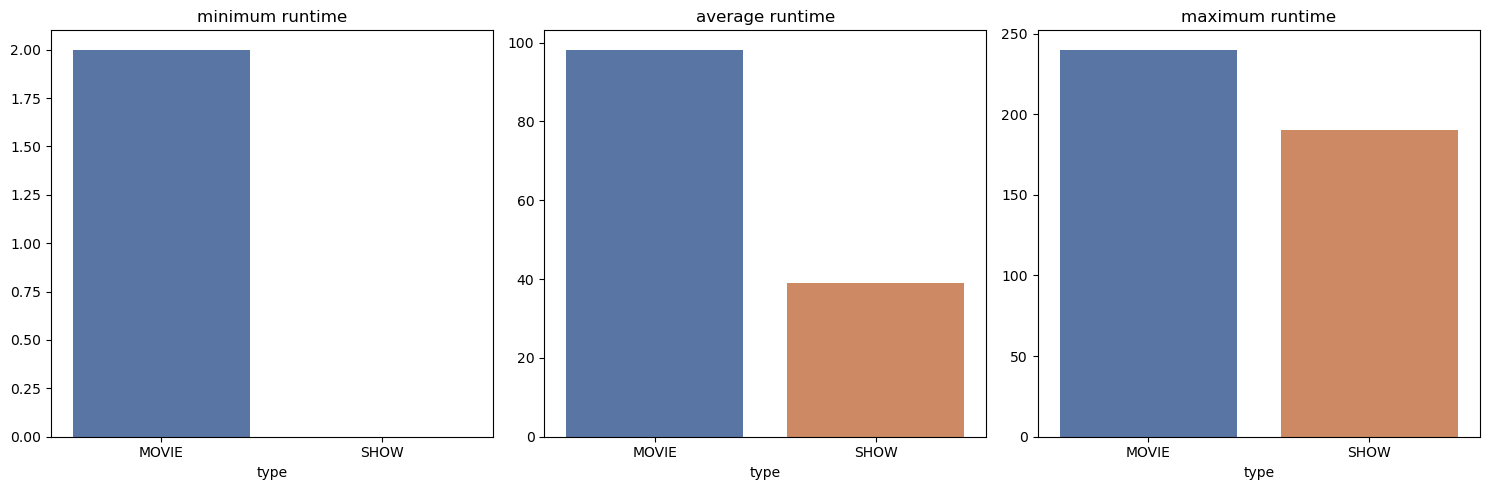

In [58]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title("minimum runtime")
min = df.groupby("type")["runtime"].min()
sns.barplot(x=min.index, y=min.values,palette="deep", ax=axes[0])

axes[1].set_title("average runtime")
avg = df.groupby("type")["runtime"].mean()
sns.barplot(x=avg.index, y=avg.values,palette="deep", ax=axes[1])

axes[2].set_title("maximum runtime")
max = df.groupby("type")["runtime"].max()
sns.barplot(x=max.index, y=max.values,palette="deep", ax=axes[2])

plt.tight_layout()
plt.show()


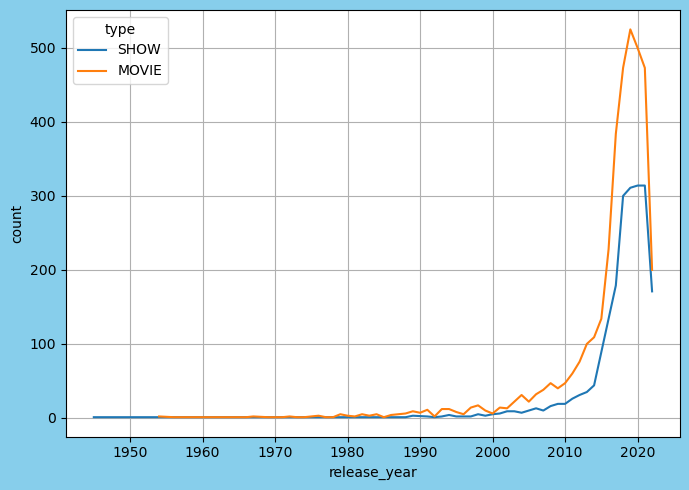

In [197]:
k = df.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(7,5),facecolor="skyblue")
sns.lineplot(x="release_year", y="count", hue="type", data=k)

plt.grid()
plt.tight_layout()
plt.show()


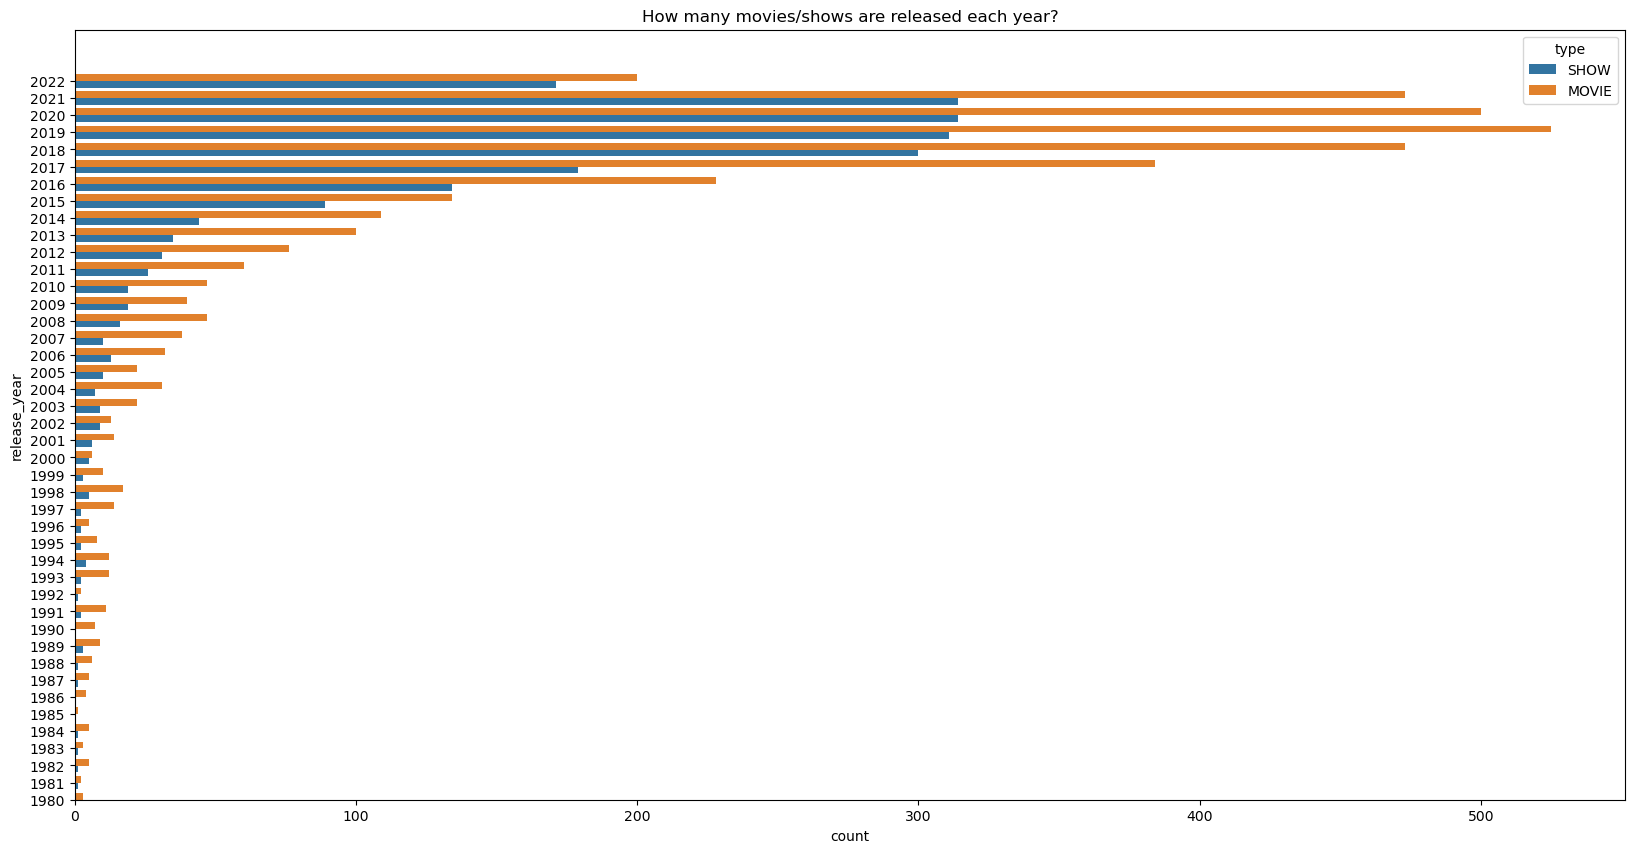

In [211]:
plt.figure(figsize=(20,10))
sns.countplot(data= df, y= 'release_year', hue='type')
plt.ylim(20,65)
plt.title('How many movies/shows are released each year?')
plt.show()

In [62]:
df

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,documentation,US,1,6.6,2233.5
1,tm84618,Taxi Driver,MOVIE,1976,R,114,crime,US,0,8.2,808582.0
2,tm154986,Deliverance,MOVIE,1972,R,109,european,US,0,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,GB,0,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,1967,TV-MA,150,war,GB,0,7.7,72662.0
...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,TV-MA,100,romance,NG,0,6.8,45.0
5846,tm898842,C/O Kaadhal,MOVIE,2021,TV-MA,134,drama,NaN,0,7.7,348.0
5847,tm1059008,Lokillo,MOVIE,2021,TV-MA,90,comedy,CO,0,3.8,68.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,NaN,US,0,6.6,2233.5


In [63]:
df[df["type"]=="SHOW"].groupby(by="type")["seasons"].value_counts()

type  seasons
SHOW  1          1221
      2           389
      3           187
      4           120
      5            79
      6            36
      7            18
      8            11
      9             9
      11            8
      10            6
      12            4
      15            3
      13            2
      24            2
      14            1
      16            1
      19            1
      20            1
      21            1
      25            1
      29            1
      32            1
      37            1
      39            1
      42            1
Name: count, dtype: int64

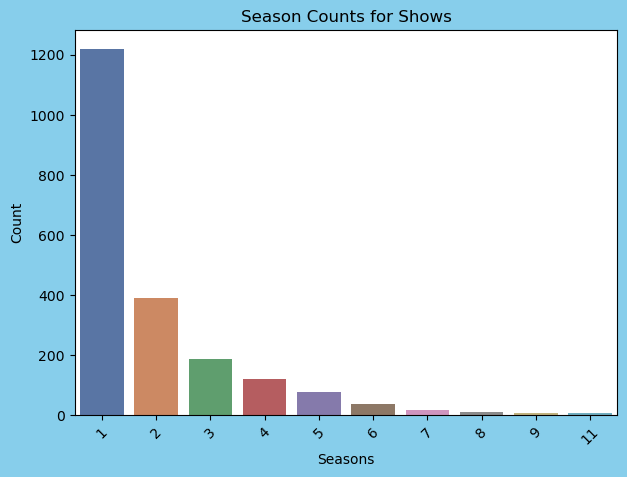

In [215]:
plt.figure(figsize=(7,5),facecolor="skyblue")
season_counts = df[df["type"] == "SHOW"].groupby("seasons").size().nlargest(10)

sns.barplot(x=season_counts.index, y=season_counts.values, palette="deep")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.title("Season Counts for Shows")
plt.xticks(rotation=45)
plt.show()


In [257]:
k=df.groupby(by="genres")["imdb_score"].mean().reset_index()

In [259]:
k

,genres,imdb_score
0,action,6.314658
1,animation,6.661572
2,comedy,6.347798
3,crime,6.690554
4,documentation,7.012081
5,drama,6.611570
6,european,6.593333
7,family,6.282533
8,fantasy,6.552410
9,history,7.121212


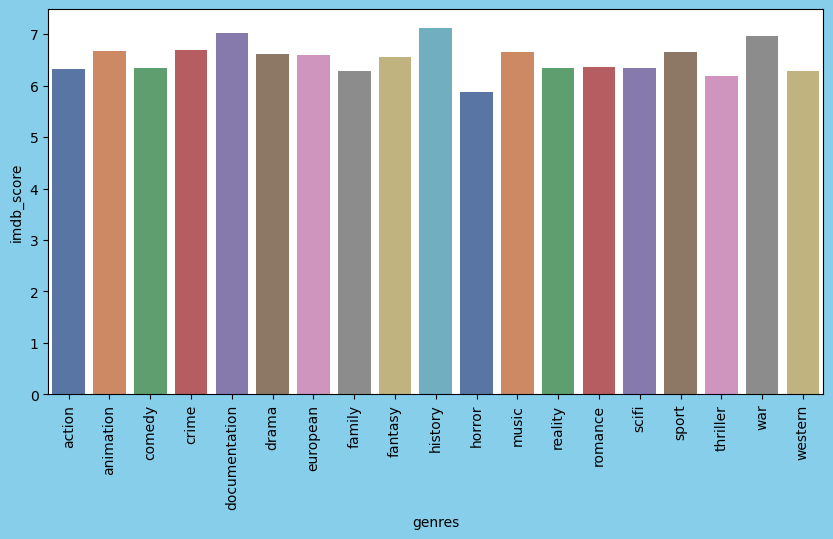

In [275]:
plt.figure(figsize=(10,5),facecolor="skyblue")
sns.barplot(x = 'genres', y = 'imdb_score', data = k,palette="deep")
plt.xticks(rotation = 90)
plt.show()

In [335]:
pd.pivot_table(data = df, index = 'production_countries', columns = 'genres', values = 'id', aggfunc = 'count', fill_value = 0)

genres,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
production_countries,,,,,,,,,,,,,,,,,,,
AE,1,0,5,0,0,3,0,1,0,0,0,0,0,0,1,1,2,0,0
AF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
AR,0,0,12,8,4,16,1,0,0,2,0,4,0,1,0,4,5,0,0
AT,0,0,1,1,0,2,1,0,0,0,0,0,0,0,1,0,2,0,0
AU,2,3,15,2,6,7,0,6,2,1,2,1,4,3,3,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UY,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
VN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
XX,1,3,9,1,2,1,1,2,1,0,0,0,0,1,0,0,0,0,0
